## MLP vs CNN
* Multi-Layer Perceptron vs Convolution Neural Network

### Preparation

##### Load the Library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__         # python=3.9

'2.7.4'

##### Declare a Global Variable

In [2]:
EPOCHS = 5
BATCH_SIZE = 128

##### Prepare Training Data

In [3]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x, test_x = tf.expand_dims(train_x/255, -1), tf.expand_dims(test_x/255, -1)

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(train_x.shape[0]).batch(BATCH_SIZE)
# Test Data are Not Shuffled.
test_ds = tf.data.Dataset.from_tensor_slices((test_x, test_y)).batch(BATCH_SIZE)

2022-10-05 20:57:48.123328: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-05 20:57:48.153609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-05 20:57:48.153791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-05 20:57:48.154522: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### NLP Model

##### Implementation

In [4]:
nlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu", input_shape=train_x.shape[1:]),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])
nlp_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
nlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28, 64)        128       
                                                                 
 dense_1 (Dense)             (None, 28, 28, 128)       8320      
                                                                 
 dense_2 (Dense)             (None, 28, 28, 256)       33024     
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense_3 (Dense)             (None, 256)               51380480  
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 51,424,522
Trainable params: 51,424,522
No

##### Training

In [5]:
nlp_model.fit(train_ds, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=test_ds)

2022-10-05 20:57:49.358106: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 376320000 exceeds 10% of free system memory.
2022-10-05 20:57:49.515515: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 376320000 exceeds 10% of free system memory.


Epoch 1/5
469/469 [==============================] - 24s 50ms/step - loss: 0.2364 - accuracy: 0.9287 - val_loss: 0.1157 - val_accuracy: 0.9639
Epoch 2/5


2022-10-05 20:58:14.076446: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 376320000 exceeds 10% of free system memory.


469/469 [==============================] - 24s 50ms/step - loss: 0.0977 - accuracy: 0.9709 - val_loss: 0.1009 - val_accuracy: 0.9676
Epoch 3/5
469/469 [==============================] - 24s 50ms/step - loss: 0.0642 - accuracy: 0.9799 - val_loss: 0.0906 - val_accuracy: 0.9722
Epoch 4/5
469/469 [==============================] - 24s 50ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0908 - val_accuracy: 0.9744
Epoch 5/5
469/469 [==============================] - 24s 50ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0861 - val_accuracy: 0.9758


##### Evaluation

In [6]:
nlp_model.evaluate(test_ds)

79/79 [==============================] - 2s 20ms/step - loss: 0.0861 - accuracy: 0.9758


[0.08605122566223145, 0.9757999777793884]

### CNN Model

##### Implementation

In [7]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=train_x.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
cnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 256)       

##### Training

In [8]:
cnn_model.fit(train_ds, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=test_ds)

Epoch 1/5


2022-10-05 21:17:08.992285: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8500
2022-10-05 21:17:09.273674: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


469/469 [==============================] - 5s 9ms/step - loss: 0.2249 - accuracy: 0.9314 - val_loss: 0.0807 - val_accuracy: 0.9752
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0627 - accuracy: 0.9806 - val_loss: 0.0512 - val_accuracy: 0.9843
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0490 - val_accuracy: 0.9853
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0429 - val_accuracy: 0.9871
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0406 - val_accuracy: 0.9878


##### Evaluation

In [9]:
cnn_model.evaluate(test_ds)

79/79 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9878


[0.04055870696902275, 0.9878000020980835]

### Model Evaluation

* The CNN model has higher accuracy and faster processing speed.

### Display for Mispredicted Images

In [34]:
pred = cnn_model.predict(test_ds, verbose=0)
pred = np.argmax(pred, axis=1) 

# Extract the index of the mispredicted images
# (The first item in the tuple(result) contains an array of indices.)
miss_idx = np.where((pred == test_y) == False)[0]

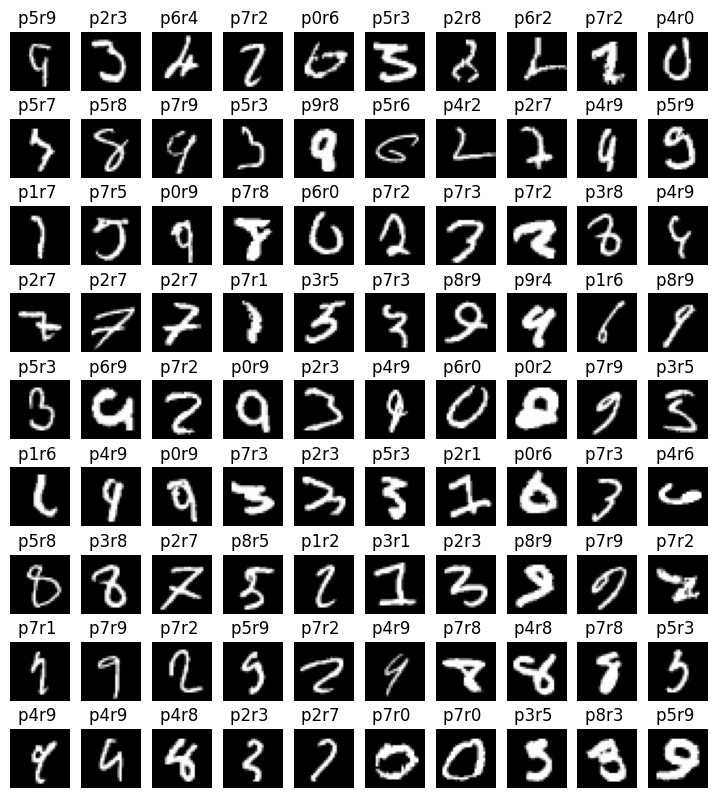

: 

In [42]:
mispredicted_size = miss_idx.shape[0]
grid_rows, grid_cols = mispredicted_size // 10, 10
if grid_rows == 0:
    grid_rows, grid_cols = 1, mispredicted_size
grid_rows = grid_rows if grid_rows < 10 else 9

fig, axs = plt.subplots(grid_rows, grid_cols, figsize=(grid_rows, grid_cols), 
                        sharex=True, sharey=True)

img_idx = 0
for i in range(grid_rows):
    for j in range(grid_cols):
        idx = miss_idx[img_idx]
        axs[i,j].imshow(test_x[idx, :, :, 0], cmap="gray")
        axs[i,j].set_title(f"p{pred[idx]}r{test_y[idx]} ")
        axs[i,j].axis("off")
        img_idx += 1
plt.show()